# Analysis
Calculates percentage gains and losses for active candidates after a candidate drops.

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import numpy as np
import pandas as pd
import os
from IPython.display import display, HTML

import stats

## Read Files Written in 02-DataCleaning

In [2]:
candidates = pd.read_csv('candidates.csv', index_col='name')

## Read File Written in 03-Modeling

In [3]:
polls = pd.read_csv('bootPolls.csv')

Convert date from string to datetime.

In [4]:
polls.date = pd.Series(pd.DatetimeIndex(polls.date))
polls.index = polls.date
del polls['date']

candidates.date = pd.to_datetime(candidates.date)

## Read Files Written in 04-Exploration

In [5]:
PollingBeforeDrop = pd.read_csv('PollingBeforeDrop.csv')
PollingAfterDrop = pd.read_csv('PollingAfterDrop.csv')

PollingBeforeDrop.index = PollingBeforeDrop['name']
PollingAfterDrop.index = PollingAfterDrop['name']

del PollingBeforeDrop['name']
del PollingAfterDrop['name']

## Calculate Difference
Create a DataFrame subtracting PollingBeforeDrop from PollingAfterDrop.

In [6]:
PollingBeforeDrop = PollingBeforeDrop.fillna(0)
PollingBeforeDrop.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
name,,,,,,,,,,,,,
Bush,38.276356,19.521200,6.121322,4.954322,7.956667,0.00000,0.000000,0.000000,0,0,13.066144,0,10.103989
Carson,41.183074,18.038500,7.575870,0.000000,7.946481,0.00000,0.000000,0.000000,0,0,16.259611,0,8.996463
Christie,35.758093,20.541815,4.385074,4.327389,7.459259,2.47313,2.026296,0.023333,0,0,14.967556,0,8.038056
Fiorina,35.758093,20.541815,4.385074,4.327389,7.459259,2.47313,2.026296,0.023333,0,0,14.967556,0,8.038056
Gilmore,38.685648,19.653519,4.193889,5.331019,8.527407,0.00000,0.000000,0.019444,0,0,12.698426,0,10.890648


In [7]:
PollingAfterDrop = PollingAfterDrop.fillna(0)
PollingAfterDrop.head()

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
name,,,,,,,,,,,,,
Bush,37.419211,19.621886,8.586922,0.000000,7.349972,0,0,0.000000,0,0,14.953164,0,12.068844
Carson,44.140356,22.032830,10.426230,0.000000,0.000000,0,0,0.000000,0,0,11.704348,0,11.696237
Christie,37.739415,19.300271,7.336343,4.437340,7.869179,0,0,0.011667,0,0,13.280548,0,10.025237
Fiorina,37.739415,19.300271,7.336343,4.437340,7.869179,0,0,0.011667,0,0,13.280548,0,10.025237
Gilmore,37.486171,19.394762,7.470675,4.343735,7.926627,0,0,0.000000,0,0,13.357024,0,10.021007


In [8]:
PollingDiff = PollingAfterDrop - PollingBeforeDrop
PollingDiff

,Trump,Cruz,Kasich,Bush,Carson,Christie,Fiorina,Gilmore,Huckabee,Paul,Rubio,Santorum,Undecided
name,,,,,,,,,,,,,
Bush,-0.857144,0.100686,2.465600,-4.954322,-0.606694,0.000000,0.000000,0.000000,0.000000,0.000000,1.887019,0.000000,1.964856
Carson,2.957281,3.994330,2.850359,0.000000,-7.946481,0.000000,0.000000,0.000000,0.000000,0.000000,-4.555263,0.000000,2.699774
Christie,1.981323,-1.241544,2.951269,0.109951,0.409919,-2.473130,-2.026296,-0.011667,0.000000,0.000000,-1.687007,0.000000,1.987181
Fiorina,1.981323,-1.241544,2.951269,0.109951,0.409919,-2.473130,-2.026296,-0.011667,0.000000,0.000000,-1.687007,0.000000,1.987181
Gilmore,-1.199478,-0.258757,3.276786,-0.987284,-0.600780,0.000000,0.000000,-0.019444,0.000000,0.000000,0.658598,0.000000,-0.869641
Huckabee,-2.344832,1.405499,-0.160357,-0.459447,0.035323,0.654098,0.341646,-0.073848,-1.730667,0.062933,3.799337,-0.447722,-1.081964
Paul,-0.434583,1.601528,-0.608903,1.321236,1.834722,0.088074,0.522407,-0.251833,0.000000,-2.601167,0.820625,-0.650833,-1.641273
Rubio,-1.748210,3.693933,3.679127,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-11.273056,0.000000,5.648205
Santorum,-0.434583,1.601528,-0.608903,1.321236,1.834722,0.088074,0.522407,-0.251833,0.000000,-2.601167,0.820625,-0.650833,-1.641273


Tests for polling differences to sum out to be about zero.

In [9]:
for i in range(len(PollingDiff.index)):
    dSum = sum(PollingDiff.iloc[i].dropna())
    assert dSum < 0.0001 and dSum > -0.0001

## Obtain Stats

In [10]:
statFrame = pd.DataFrame(stats.GenStats(PollingBeforeDrop, PollingAfterDrop, PollingDiff))
statFrame = statFrame[['name', 'Polling Differences', 'Polling of Dropout', 'Polling Sum Negative', 'Polling Sum Positive',
                       'Polling Sum Positive Percentages', 'Polling Sum All Percentages', 'Winner Names', 'Winner Percs', 
                         'Winner Polls Before', 'Winner Polls After', 'Winner Polls Diff']]
statFrame.index = statFrame.name
del statFrame['name']  # deletes duplicate 'name' column since the index is now also 'name'
statFrame.head()

,Polling Differences,Polling of Dropout,Polling Sum Negative,Polling Sum Positive,Polling Sum Positive Percentages,Polling Sum All Percentages,Winner Names,Winner Percs,Winner Polls Before,Winner Polls After,Winner Polls Diff
name,,,,,,,,,,,
Bush,Trump -0.857144 Cruz 0.100686 Ka...,-4.954322,-1.463839,6.418161,Trump 0.000000 Cruz 0.015688 Ka...,Trump -0.133550 Cruz 0.015688 Ka...,[Kasich],[0.384159879647],[6.12132222222],[8.58692222222],[2.4656]
Carson,Trump 2.957281 Cruz 3.994330 Ka...,-7.946481,-4.555263,12.501744,Trump 0.236550 Cruz 0.319502 Ka...,Trump 0.236550 Cruz 0.319502 Ka...,[Cruz],[0.319501782122],[18.0385],[22.0328296296],[3.99432962963]
Christie,Trump 1.981323 Cruz -1.241544 Ka...,-2.473130,-4.966514,7.439644,Trump 0.266320 Cruz 0.000000 Ka...,Trump 0.266320 Cruz -0.166882 Ka...,[Kasich],[0.396694905367],[4.38507407407],[7.33634299517],[2.9512689211]
Fiorina,Trump 1.981323 Cruz -1.241544 Ka...,-2.026296,-5.413348,7.439644,Trump 0.266320 Cruz 0.000000 Ka...,Trump 0.266320 Cruz -0.166882 Ka...,[Kasich],[0.396694905367],[4.38507407407],[7.33634299517],[2.9512689211]
Gilmore,Trump -1.199478 Cruz -0.258757 Ka...,-0.019444,-3.915939,3.935384,Trump 0.000000 Cruz 0.000000 Ka...,Trump -0.304793 Cruz -0.065751 Ka...,[Kasich],[0.832647093424],[4.19388888889],[7.47067460317],[3.27678571429]


## Graphing Polling Differences
Functions used to graph data for each dropped out candidate.

In [11]:
def SetFontSizes(cands):
    """Sets the labels for the x and y axises. Sets the font sizes for the x and y labels. Set the font size for the
       tick parameters based on how many candidates are still in the race. 
    
    Parameters
    ----------
    cands : list(str)
        The names of the candidates who are still in the race.
    """
    
    font = 8 if len(cands) > 9 else 10
    plt.tick_params(labelsize=font)
    plt.xlabel("Candidates", size=12)
    plt.ylabel("Polling", size=12)

In [12]:
def PlotAfter(name, names):
    """Plots the graph with the polling data after a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    actives = PollingAfterDrop.loc[name] != 0
    cands = PollingAfterDrop.columns[actives]
    
    plt.title("Average Polling After " + names + " Suspended Campaign", size=14)
    sns.barplot(cands, PollingAfterDrop.loc[name][actives])
    SetFontSizes(cands)
    
def PlotBefore(name, names):
    """Plots the graph with the polling data before a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    actives = PollingBeforeDrop.loc[name] != 0
    cands = PollingBeforeDrop.columns[actives]
    
    plt.title("Average Polling Before " + names + " Suspended Campaign", size=14)
    sns.barplot(cands, PollingBeforeDrop.loc[name][actives])
    SetFontSizes(cands)

In [13]:
def DisplayPercentages(ax, percs):
    """Display percentages of the total gained supporters after a candidate drops off.
    
    Parameters
    ----------
    ax : plot
        The Seaborn plot to be displayed.
    percs : Series
        Holds a list of percentages of winnings indexed by candidates.
    """
    
    for p in range(len(ax.patches)):
        height = ax.patches[p].get_height()
        if percs[p] > 0:
            ax.text(ax.patches[p].get_x(), height + 0.25, '%1.1f%%' % (percs[p] * 100), size=18)
            
    if percs[-1] > 0:
        ax.text(ax.patches[-1].get_x(), height + 0.25, '%1.1f%%' % (percs[-1] * 100), size=18)

def PlotDiff(name, names):
    """Plots the graph with the polling difference from before to after a candidate suspended their campaign.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    names : str
        The names of the candidates who suspended their campaigns. Relevant only to [Paul, Santorum] and [Christie, Fiorina].
    """
    
    font = 18 if len(names) < 10 else 16
    plt.title("Polling Difference After " + names + " Suspended Campaign", size=font)
    actives = PollingDiff.loc[name] != 0
    if name == 'Santorum':
        actives &= (PollingDiff.loc[name].index != 'Paul')
    if name == 'Christie':
        actives &= (PollingDiff.loc[name].index != 'Fiorina')
    
    cands = PollingDiff.columns[actives]
    data = PollingDiff.loc[name][actives]
    ax = sns.barplot(cands, data)
    plt.tick_params(labelsize=14)
    plt.xlabel("Candidates", size=18)
    plt.ylabel("Polling", size=18)
    plt.ylim(ax.get_ylim()[0] ,data.max() + 1)
    
    percs = statFrame["Polling Sum Positive Percentages"][name]
    del percs[name]
    if name == 'Santorum':
        del percs['Paul'] 
    if name == 'Christie':
        del percs['Fiorina'] 
    
    DisplayPercentages(ax, percs)

In [14]:
def WinningStats(name):
    stat = statFrame.loc[name]
    winners = stat['Winner Names']
    
    if len(winners) > 0:
        for w in range(len(winners)):
            print(winners[w] + " gained " + str("%1.2f" % stat['Winner Polls Diff'][w]) + \
                  " percentage points in polling, or " + str("%1.2f" % (stat['Winner Percs'][w] * 100)) + \
                  "% of all polling gains, going up from " + str("%1.2f" % stat['Winner Polls Before'][w]) + \
                  " to " + str("%1.2f" % stat['Winner Polls After'][w]))

        print("after " + name + \
              " suspended his campaign giving up " + str("%1.2f" % (-stat['Polling of Dropout'])) + \
              " polling percentage and other candidates lost a cumulative " + \
              str("%1.2f" % (-stat['Polling Sum Negative'])) + ".")
    else:
        print("No one gained a considerable amount more than anyone else.")

In [15]:
def PlotPolling(name):
    """Plots the Before, After, and Diff plots.
    
    Parameters
    ----------
    name : str
        The name of the candidate who suspended their campaign.
    """
    
    display(HTML("<h4>" + str(candidates['date'][name].date()) + "</h4>"))
    WinningStats(name)
    
    names = name
    if names == 'Santorum':
        names = 'Paul and Santorum'
    if names == 'Christie':
        names = 'Christie and Fiorina'
        
    plt.figure(figsize=(20,14))
    plt.subplot2grid((3,4), (0,0), colspan=2)
    PlotBefore(name, names)
    plt.subplot2grid((3,4), (0,2), colspan=2)
    PlotAfter(name, names)
    plt.subplot2grid((3,4), (1,0), colspan=4, rowspan=2)
    PlotDiff(name, names)

Generate polling snippets to display.

In [16]:
pollList = []
i = 0
pollIndex = [c for c in candidates.index if candidates.dropped[c] == True]
for p in pollIndex:
    pollList.append({'index': i, 'name': p, 'poll': stats.BiWeekPolling(polls, candidates, p)})
    i += 1

### Mike Huckabee Suspends His Campaign

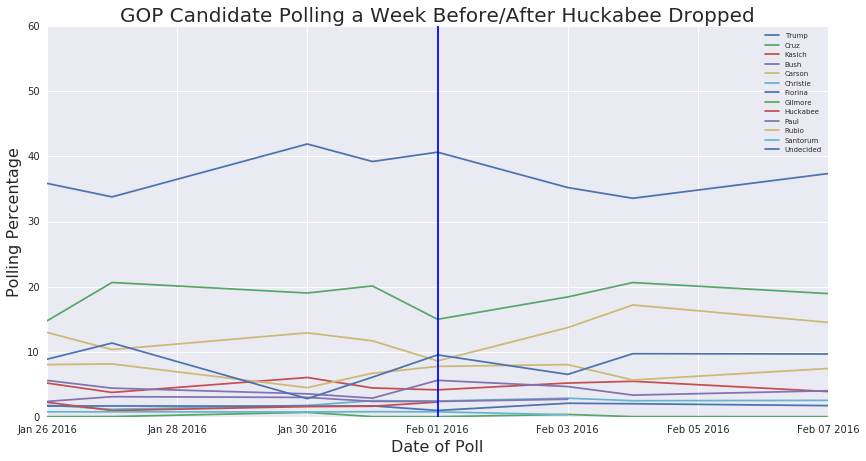

In [17]:
stats.PlotChart(candidates, pollList[5]['poll'], 'Huckabee')

Rubio gained 3.80 percentage points in polling, or 60.32% of all polling gains, going up from 11.29 to 15.09
after Huckabee suspended his campaign giving up 1.73 polling percentage and other candidates lost a cumulative 4.57.


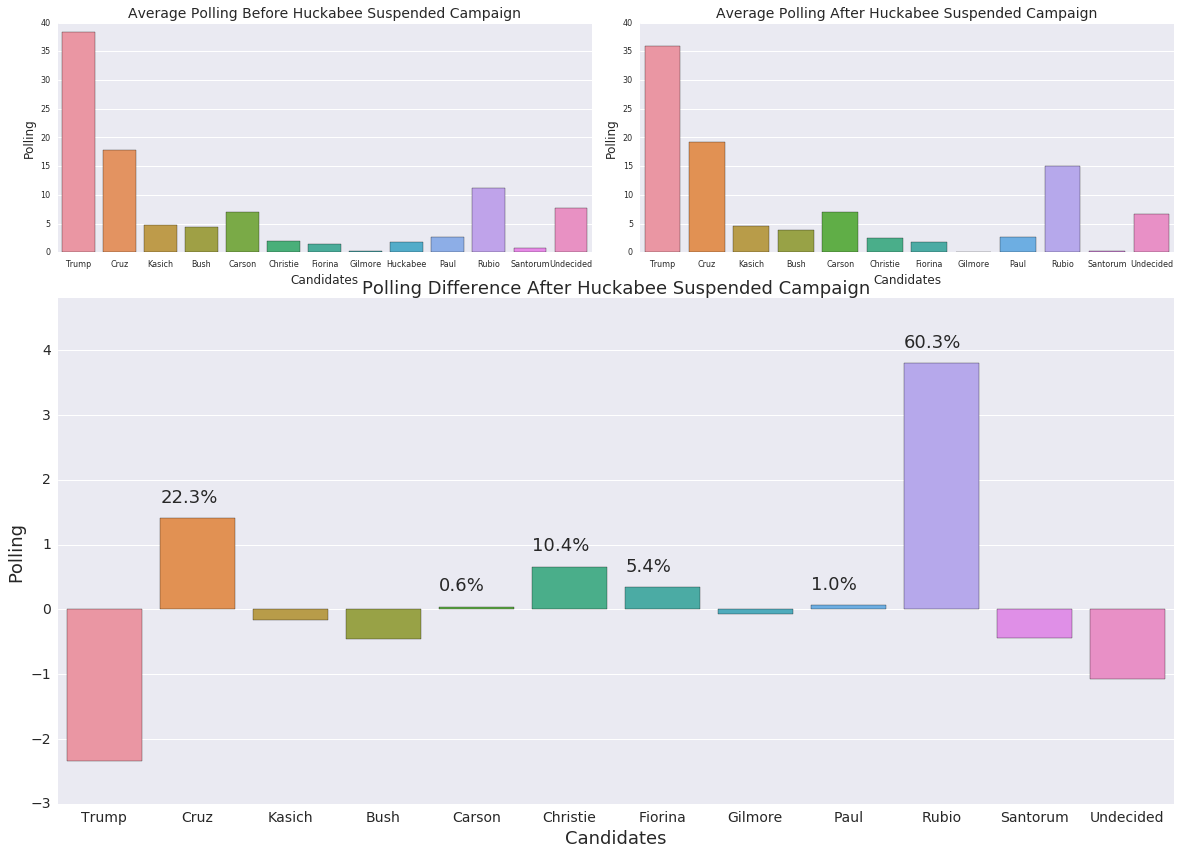

In [18]:
PlotPolling('Huckabee')

### Rand Paul and Rick Santorum Suspend Their Campaigns

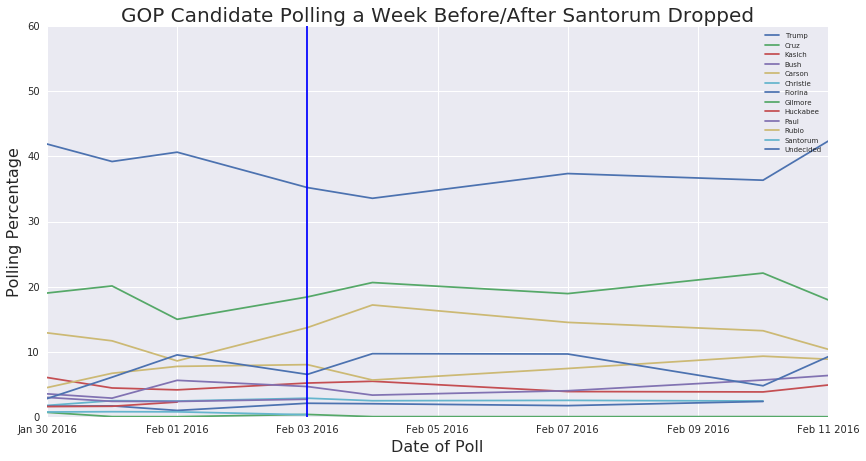

In [19]:
stats.PlotChart(candidates, pollList[8]['poll'], 'Santorum')

Carson gained 1.83 percentage points in polling, or 29.65% of all polling gains, going up from 6.73 to 8.57
Cruz gained 1.60 percentage points in polling, or 25.88% of all polling gains, going up from 18.13 to 19.73
after Santorum suspended his campaign giving up 0.65 polling percentage and other candidates lost a cumulative 5.54.


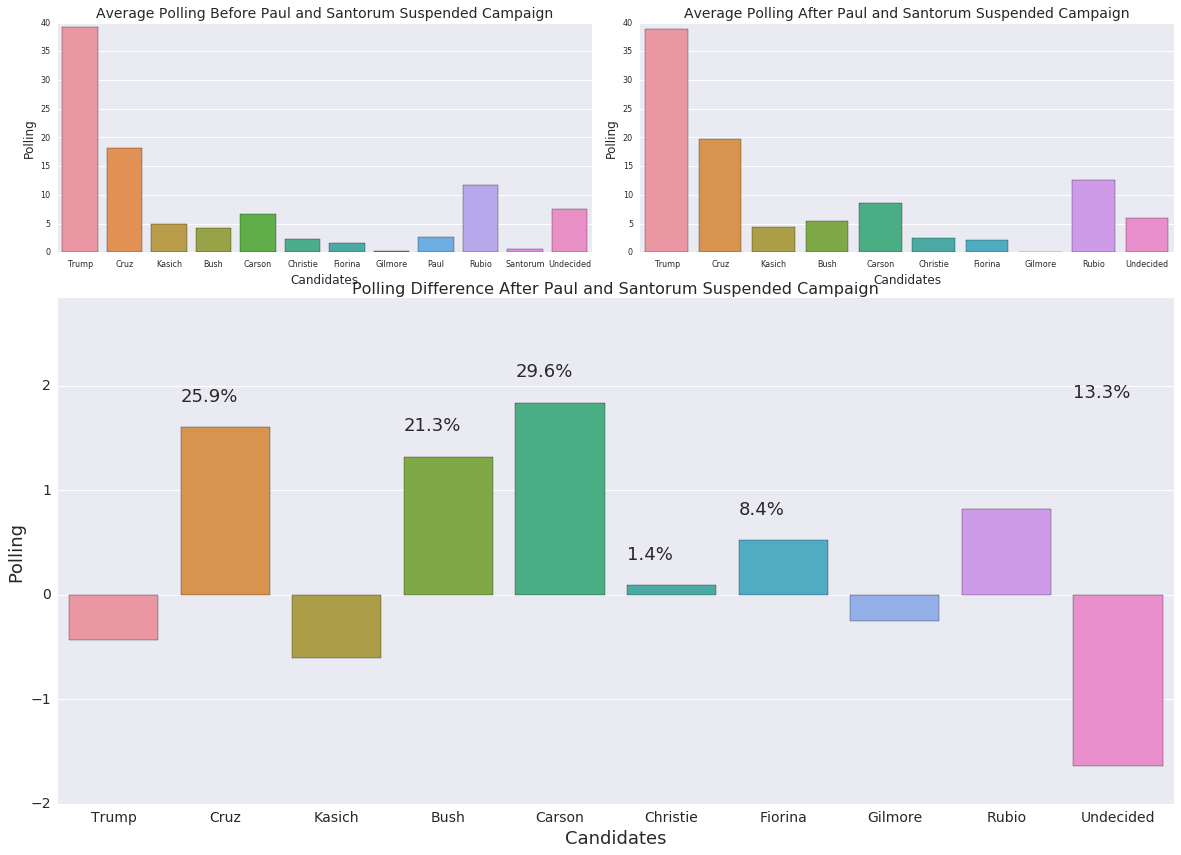

In [20]:
PlotPolling('Santorum')

### Chris Christie and Carly Fiorina Suspend Their Campaigns

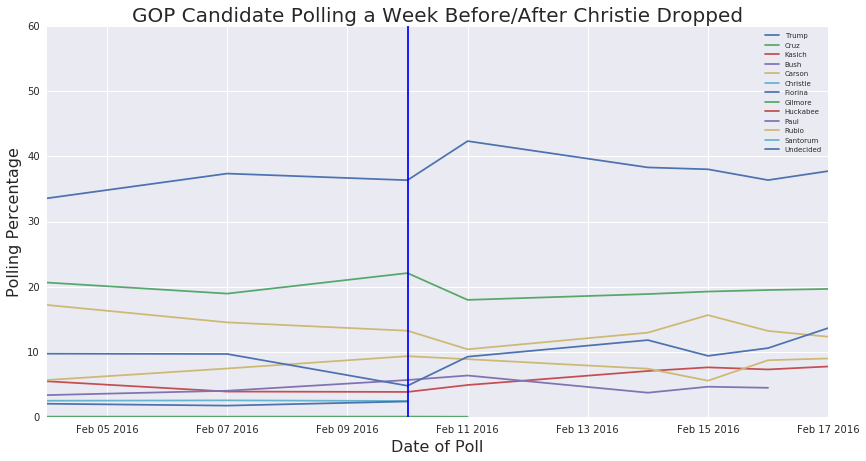

In [21]:
stats.PlotChart(candidates, pollList[2]['poll'], 'Christie')

Kasich gained 2.95 percentage points in polling, or 39.67% of all polling gains, going up from 4.39 to 7.34
after Christie suspended his campaign giving up 2.47 polling percentage and other candidates lost a cumulative 4.97.


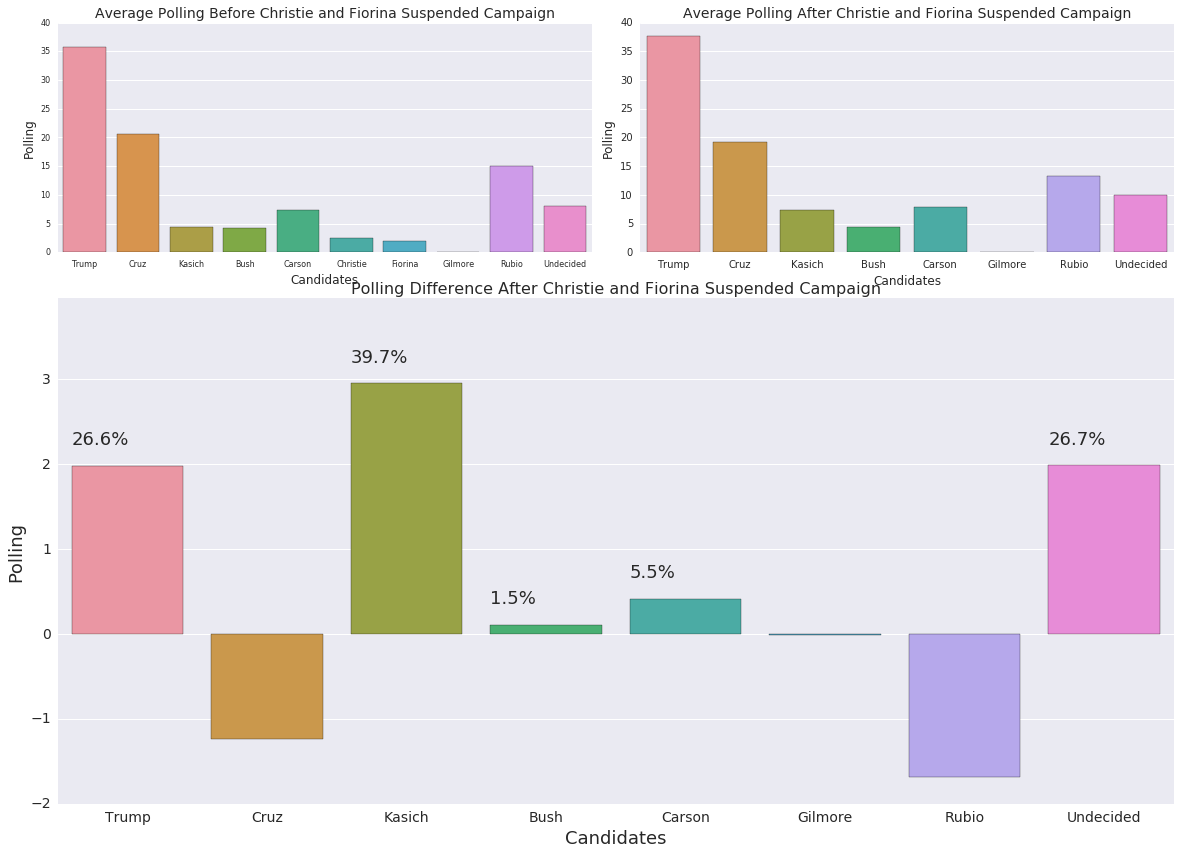

In [22]:
PlotPolling('Christie')

### Jim Gilmore Suspends His Campaign

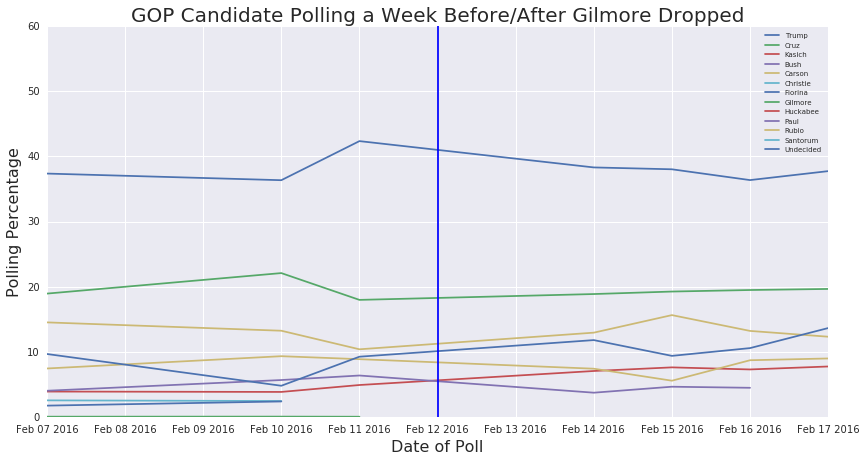

In [23]:
stats.PlotChart(candidates, pollList[4]['poll'], 'Gilmore')

Kasich gained 3.28 percentage points in polling, or 83.26% of all polling gains, going up from 4.19 to 7.47
after Gilmore suspended his campaign giving up 0.02 polling percentage and other candidates lost a cumulative 3.92.


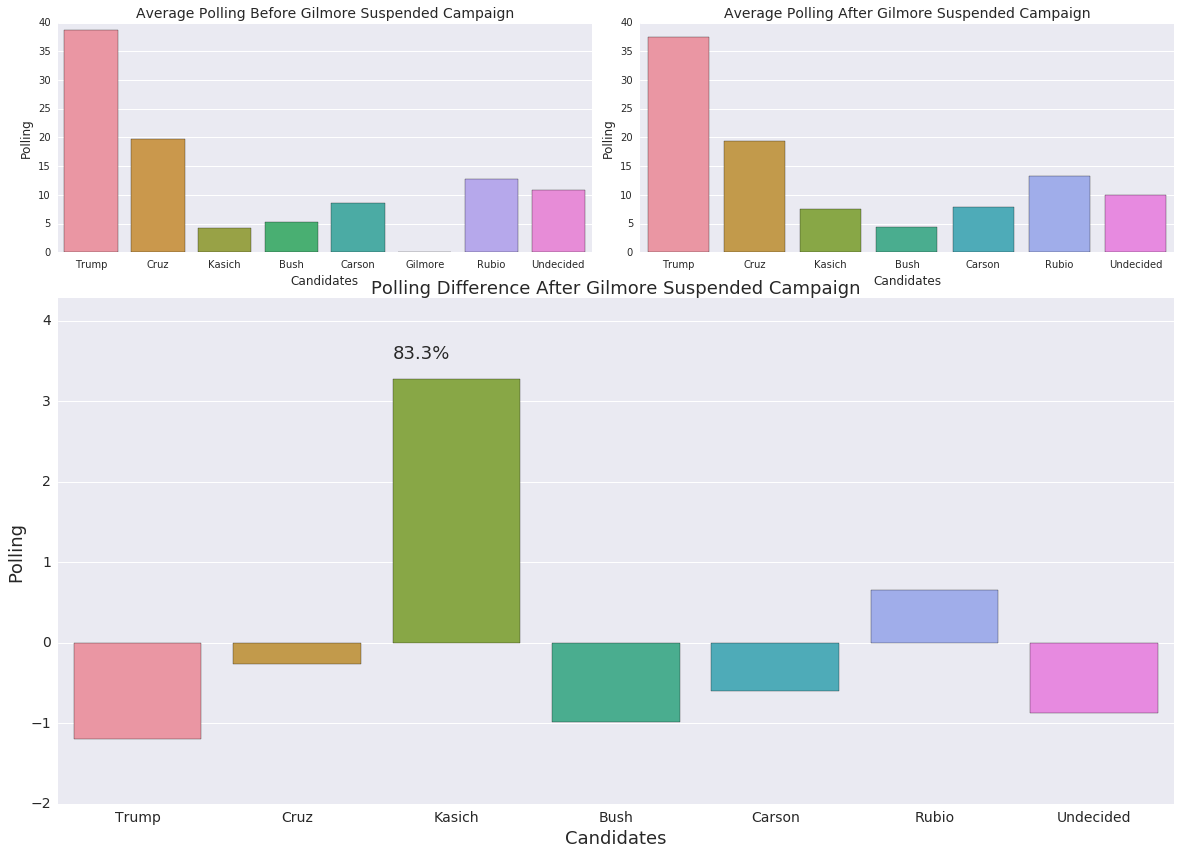

In [24]:
PlotPolling('Gilmore')

### Jeb Bush Suspends His Campaign

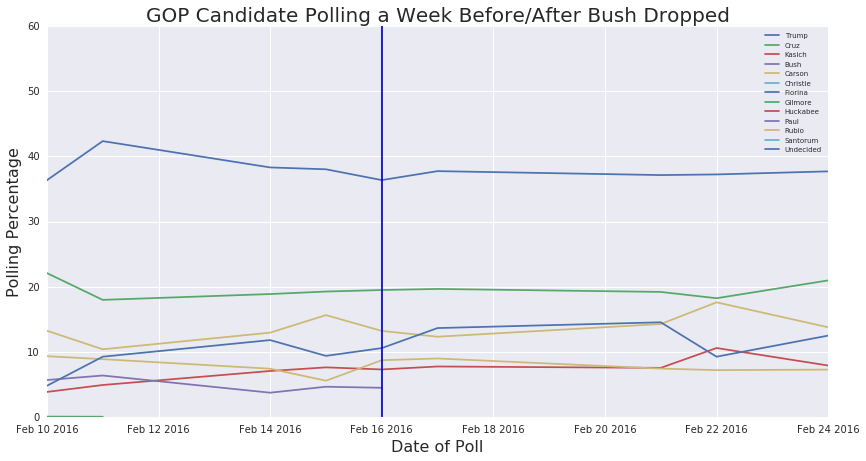

In [25]:
stats.PlotChart(candidates, pollList[0]['poll'], 'Bush')

Kasich gained 2.47 percentage points in polling, or 38.42% of all polling gains, going up from 6.12 to 8.59
after Bush suspended his campaign giving up 4.95 polling percentage and other candidates lost a cumulative 1.46.


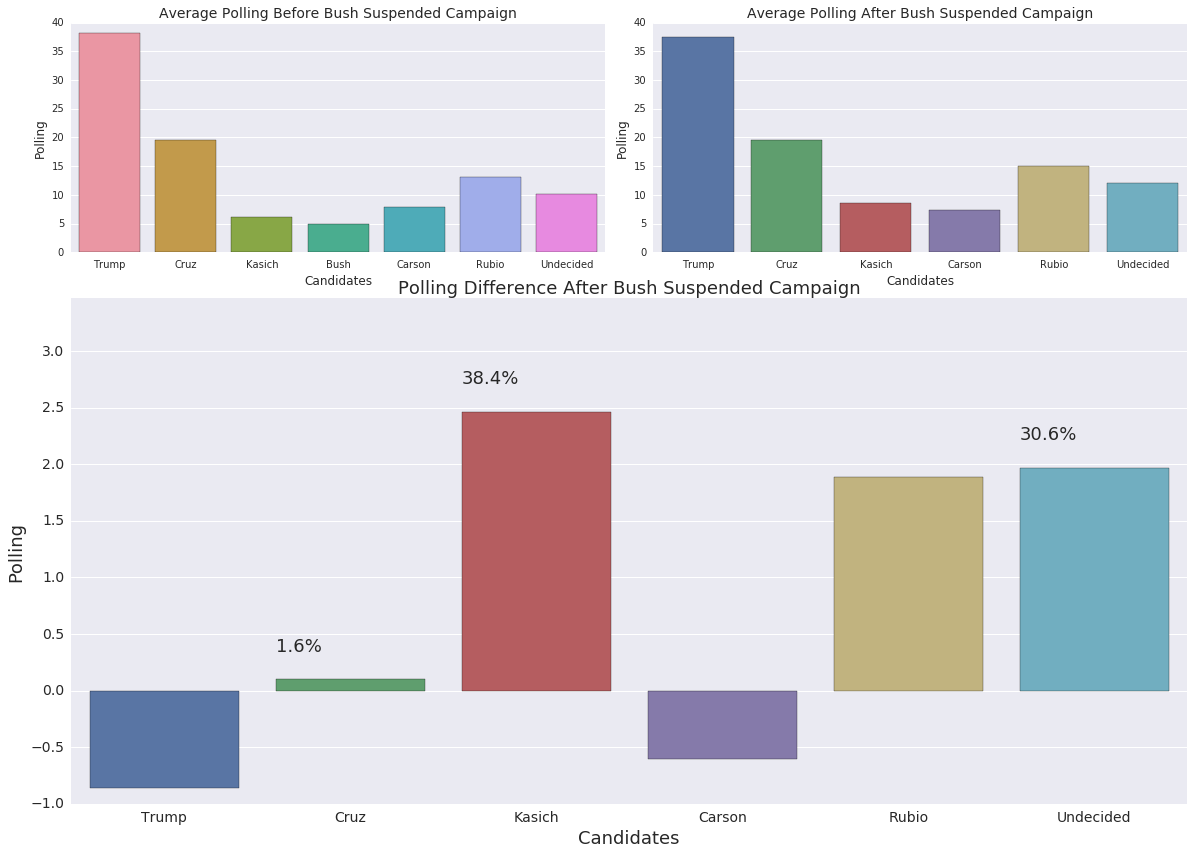

In [26]:
PlotPolling('Bush')

### Ben Carson Suspends His Campaign
It doesn't look like Carson's endorsement of Trump helped Trump noticeably.

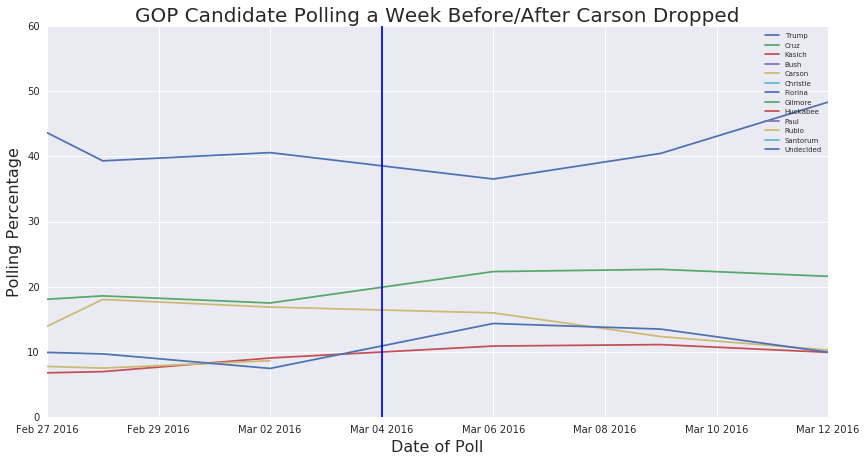

In [27]:
stats.PlotChart(candidates, pollList[1]['poll'], 'Carson')

Cruz gained 3.99 percentage points in polling, or 31.95% of all polling gains, going up from 18.04 to 22.03
after Carson suspended his campaign giving up 7.95 polling percentage and other candidates lost a cumulative 4.56.


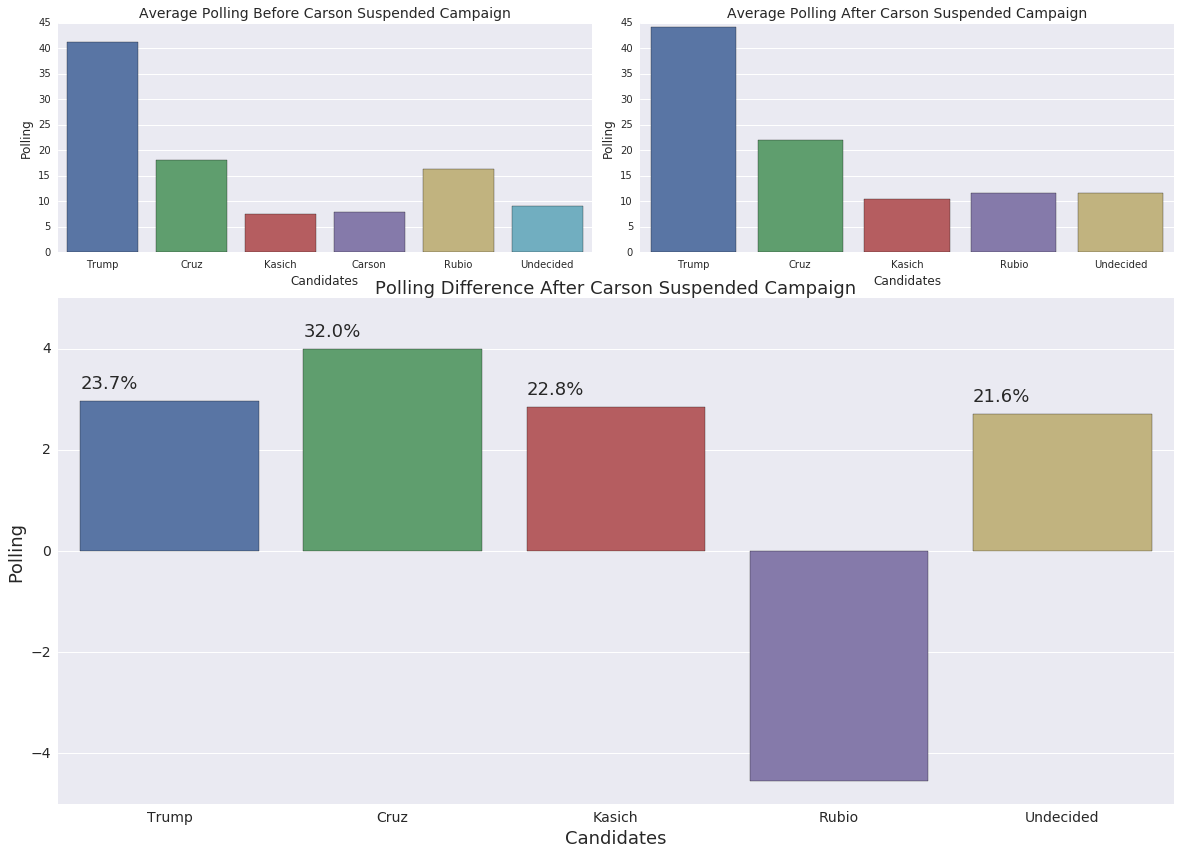

In [28]:
PlotPolling('Carson')

### Marco Rubio Suspends His Campaign

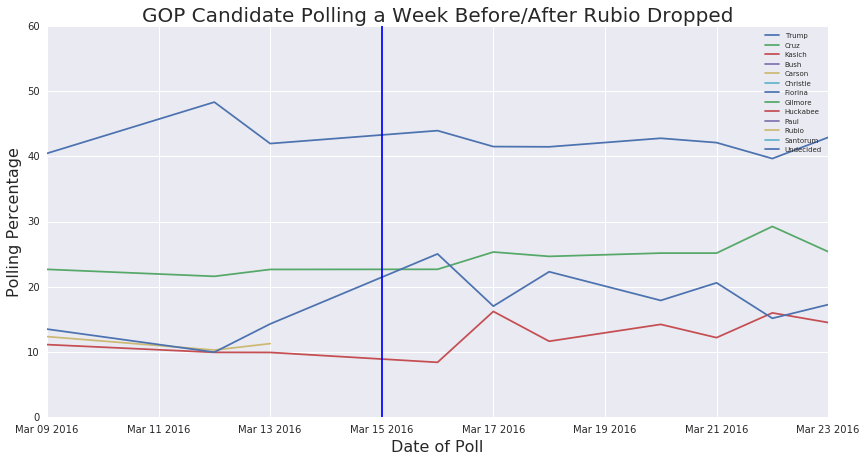

In [29]:
stats.PlotChart(candidates, pollList[7]['poll'], 'Rubio')

Undecided gained 5.65 percentage points in polling, or 43.38% of all polling gains, going up from 12.55 to 18.20
after Rubio suspended his campaign giving up 11.27 polling percentage and other candidates lost a cumulative 1.75.


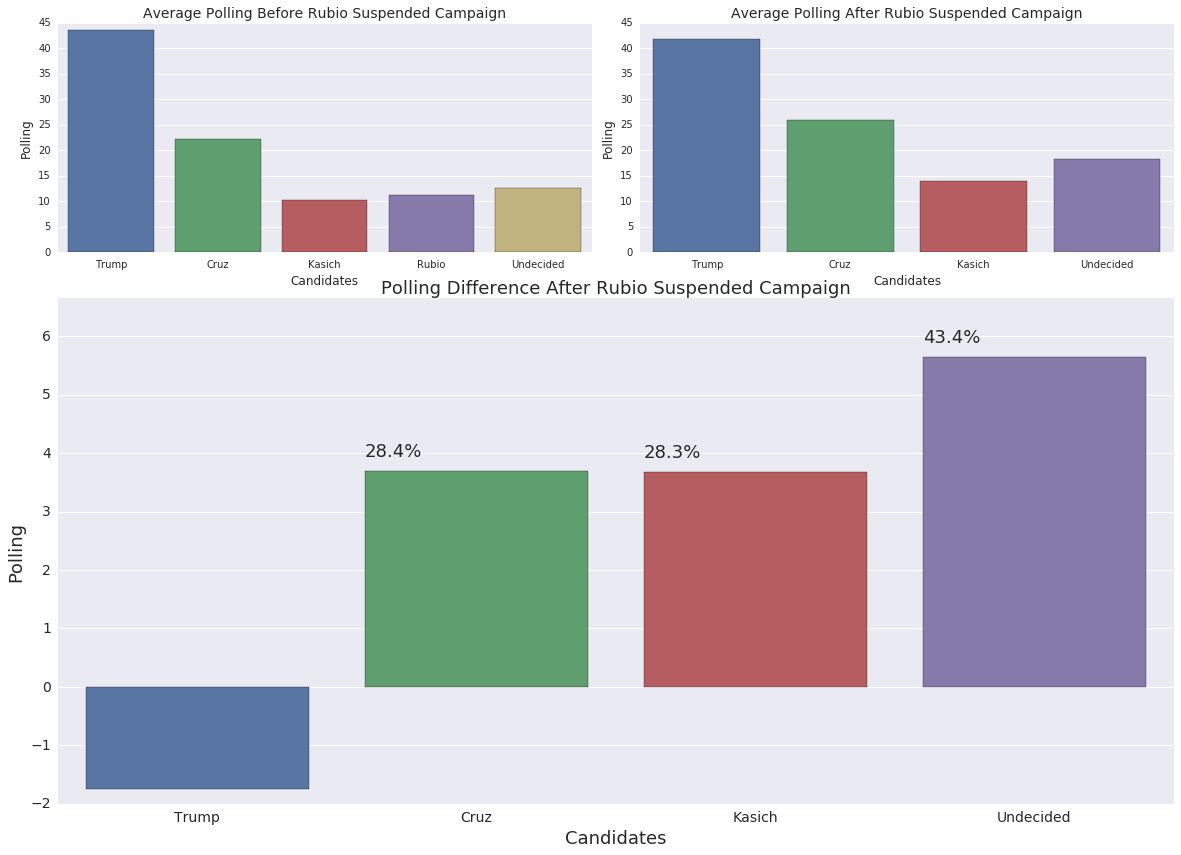

In [30]:
PlotPolling('Rubio')